---
 Computational Statistics | Summer 2020, M.Sc. in Economics, University of Bonn | [Sona Verdiyeva](https://github.com/s6soverd)
 
---

### Table of Contents

* [1. Bias and Variance tradeoff in Machine Learning](#bias)
* [2. What is meant by "high-dimensional" and why OLS fails in estimating the parameters in such problems](#high-dim)
* [3. LASSO doesn't have a closed form solution, or does it?](#solution)
   

---
### 1. Bias and Variance tradeoff in Machine Learning <a class="anchor" id="bias"></a>
---

The inability of a machine learning method to capture the true relationship between the dependent and independent variables is called **bias**. Given two methods, we can compare how much bias each has, by calculating their sum of squared residuals. In other words; $\sum_{i = 1}^n (y_{i} - \hat{y})^2$. The formulae is applied for the training set, to which we have fit the model. 

Using the fitted model, we can calculate predictions for the testing set. And the difference in sum of squared residuals for the training and test set is called **variance**. Thus, a model that overfits the training set is going to have a very low bias, but this low-bias will come at the high cost of variance; meaning less precise predictions for the testing, or rather, new dataset. 

Having higher variance means that the model is highly variable with respect to how well it is going to make predictions on the new datasets. It might sometimes do well, sometimes do terrible. A model with lower variance and high bias; on the other hand, will consistently give good predictions for different datasets due to having lower variance, but perhaps not great predictions, as it has a higher bias. 

In machine learning, the best algorithm has low bias, meaning, the method accurately models the true relationship, and has low variance, meaning, across different datasets, it consistently produces good predictions. And there are three commonly used Machine learning(also known as ML) methods that try to achieve that; namely:

 * Regularization
 * Boosting
 * Bagging
 
And in what follows, I will solely focus on regularization out of the three above, and more specifically on LASSO(also known as Least Absolute Shrinkage and Selection Operator).

---
### 2. What is meant by "high-dimensional" and why OLS fails in estimating the parameters in such problems <a class="anchor" id="high-dim"></a>
---

The term "high-dimensional" refers to the case where we have more unknown parameters than the data available; mathematically, $p\gg n$. 

OLS is helpless in estimating the parameters when the given number of unknown parameters are much higher than the available data points. To be able to estimate the parameters, the n should be at least p + 1. 

For $p > n$, the linear model, as we know $Y = X*\beta^0 + \epsilon$ has no unique solution, and the linear model is under-determined. As a matter of fact, the linear model or the above equation has infinitely many solutions. 

To illustrate my point, I will use a very simple linear model, the one with the intercept (or rather $\beta_0$) and the slope (or rather $\beta_1$). And we have, for simplicity, have just one data point available. Given these, it is apparent that our unknowns(p = 1) are more than the data points (n = 1). As said before, n should be at least p + 1, meaning, 2, in order to calculate the $\beta_0$ and $\beta_1$. The model that I suggest falls down to calculating:
$Y = \beta_0 + \beta_1 * X_1$. 
From high-school algebra, we know that here $\beta_1$ corresponds to the slope of the line, namely, *m*; and the $\beta_0$ corresponds with the y-intercept, namely *b*. So in a way we can write the above model as:
$y = b + m*x$. 

To calculate *m*,  we need to have 2 data points. However, here, we are given only 1 data point. 

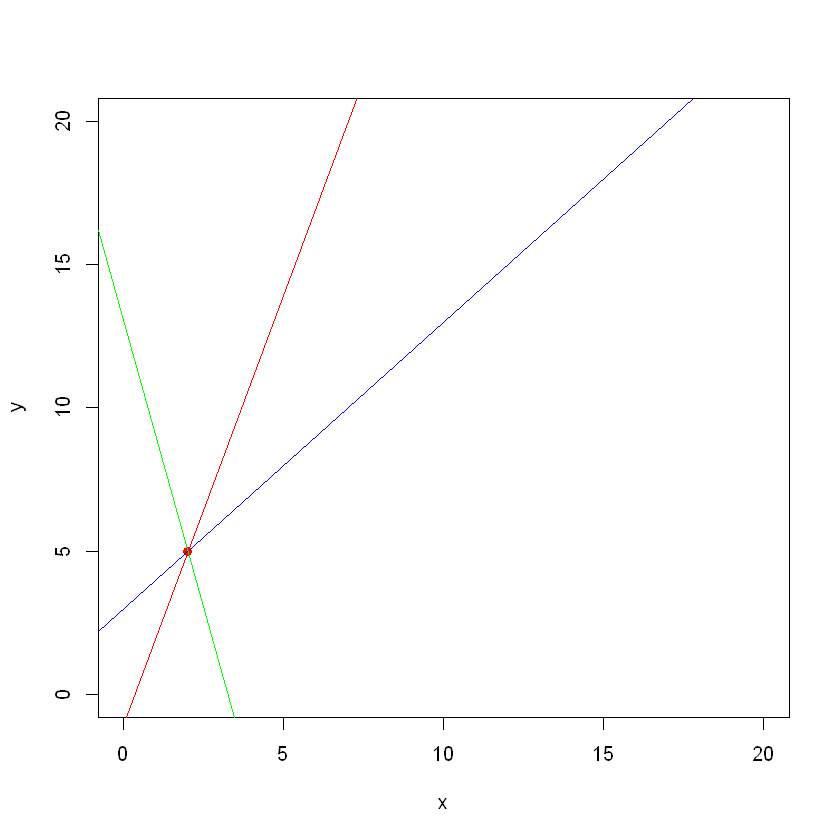

In [19]:
plot(x = 2, y = 5, xlim = c(0,20),ylim = c(0,20),type = "p", col = "red", pch = 16, xlab = "x", ylab = "y")
abline(3, 1, col = "blue")
abline(-1, 3, col = "red")
abline(13, -4, col = "green")

As it is apparent from the above plot, from the one data point, one can draw infinitely many different lines, all having the sum of squared residuals equal to zero; thus, there is no one unique $\beta_0$ and $\beta_1$ which minimizes the sum of sqaured residuals. Given this, we have infinitely many solutions; or more pessimistically, OLS doesn't have a solution for this rather simplified "high-dimensional" problem.

Thus, without any constraints or additional information, it is impossible to find a solution to the above problem. If we are given a constraint, out of many solutions, we can pick the one that satisfies that constraint, hence being the solution to the above problem. 

In this regard, regularization methods come at handy. Before delving into how LASSO is commonly sought after in problems of high-dimensional nature, I will discuss two assumptions that build the intutition behind LASSO.
 > Sparsity assumption
 
 > Basis Pursuit Linear program

Sparsity assumption for an unknown vector means that  that vector has less number of non-zero elements; hence the name sparse. So the sparsity assumption for the true $\beta$ is a constraint that results in beta having less number of non-zero elements. One way of doing this is to use *$l_0$*-norm. For a quick brush-up, the *$l_0$*-norm, *$l_1$*-norm and *$l_2$*-norm are defined as:

---
$$\| \beta \|_0 = \sum_{j = 1}^{p} I(\beta_{j} \neq 0) \\[1pt]
\| \beta \|_1 = \sum_{j = 1}^{p} |\beta_{j}| \\[1pt]
\| \beta \|_2 = \sum_{j = 1}^{p} \beta_{j}^2 \\[1pt] 
$$

---





Our *$l_{0}$*-norm constrained optimization looks like this:

---
$$\underset{\beta \in \mathbb{R}}{\text{minimize}} \
\| \beta \|_0 \\
\text{subject to} \
 Y = X\beta \\
$$

The above constrained optimization problem is like a best subset selection. However, when our p is quite large, then we need to look at $\binom{p}{s}$ number of subsets, where $s \leq n$, which is computationally infeasible. 

*Basis Pursuit Linear Program* uses *$l_1$*-norm to solve the equation:

---
$$\underset{\beta \in \mathbb{R}}{\text{minimize}} \
\| \beta \|_1 \\
\text{subject to} \
 Y = X\beta \\
$$

---


Now, using a simplified example (Niharika,. G., (2018)), we can show how under sparsity assumption, one can solve under-determined linear equation. Suppose we have the below equation:
$$ \begin{bmatrix}
       2\\[0.3em]
       2 \\[0.3em]
     \end{bmatrix} = \begin{bmatrix} 
                             2 & 1 & 0 \\[0.3em]
                             2 & 0 & 1 \\[0.3em]
                      \end{bmatrix}  \times   \begin{bmatrix} 
                                              \beta_1 \\[0.3em]
                                              \beta_2 \\[0.3em]
                                              \beta_3 \\[0.3em]
                                             \end{bmatrix}
$$
     

Let's assume that the $\beta$ has a sparse solution. To find the solution, we set certain components of the subset of $\beta$ to zero such that equation holds. Here are some solutions:
$$[\beta_1 = 1, \: \beta_2 = 0, \; \beta_3 = 0], \; \| \beta \|_0 = 1, \; \| \beta \|_1 = 1 \\
[\beta_1 = 0, \: \beta_2 = 2, \; \beta_3 = 2], \; \| \beta \|_0 = 2, \; \| \beta \|_1 = 4
$$

The solution with the least number of non-zero elements is $[\beta_1 = 1, \: \beta_2 = 0, \; \beta_3 = 0]$, since $\| \beta \|_0 = 1 < \| \beta \|_0 = 2$. And the solution of Basis Pursuit Linear Program is also the same for this particular equation; meaning $[\beta_1 = 1, \: \beta_2 = 0, \; \beta_3 = 0]$, since $\| \beta \|_1 = 1 < \| \beta \|_1 = 4$.

In the proceeding section, I will discuss how shrinkage of coeffiecients, whose intution we built throughout this section, helps in finding a solution to high-dimensional problems, and LASSO's central role in it.

---
### 3. LASSO doesn't have a closed form solution, or does it? <a class="anchor" id="solution"></a>
---

LASSO is a *$l_1$*-regularized regression method. It estimates the regression parameters by solving the below constrained optimization problem:

---
$$\underset{\beta \in \mathbb{R^{p}}}{\text{minimize}} \
\frac{1}{n}\| Y - X\beta \|_2^2 \\
\text{subject to} \\
\| \beta \|_1 \leq t
$$

---

where $t$ is a upper-bound over $l_1$-norm. It is obvious from the inequality that if our $t \geq \hat{\beta}^{OLS}$, then our LASSO estimate and OLS estimate are the same. Since OLS-estimated beta minimizes the sum of squared residuals and at the same time, satisfies the constraint as well. If our $t \leq \hat{\beta}^{OLS}$, then LASSO will shrink the coefficients towards zero, or even set some to zero. 

The Lagrange function corresponding to the above constrained regression optimization is given below. For a quick note, Langrangian  of an optimization problem is the sum of objective function and its weighted constraints.

---
$$\hat{\beta(\lambda)} = \underset{\beta \in \mathbb{R^{p}}}{\text{arg min}} \
\frac{1}{n}\| Y - X\beta \|_2^2 + \lambda\| \beta \|_1 \\
$$

---

where $\lambda \geq 0$ is a parameter that determines the intensity of shrinkage. Because the objective function above is not differentiable ($|x|$ has no derivative at 0, hence, not differentiable, same hold for $\| \beta \|_1 = | \beta |$), the LASSO has generally no closed form solution. However, in the case of single-variable model and orthonormal design matrix (basically, for each $i \neq j,  \: X_{i}^T X_{j} = 0$, meaning the variables are uncorrelated), a solution is derivable. 
In the paragraphs that follow, we will look at how to derive a LASSO solution for the single-variable case and why for multi-variable models, this doesn't work.

**Simple Linear Regression** 

Assume we have one predictor, $p = 1$, and also our predictor is standardized ($Y = X_1\beta_1 + \epsilon$). Then, the optimization problem is reduced down to finding the $\hat{\beta}^{LASSO}$ that is the solution to $\underset{\beta \in \mathbb{R^{p}}}{\text{minimize}} \
\frac{1}{n}\| Y - X_1\beta_1 \|_2^2 + \lambda| \beta_1 |$. Then, from the Stationarity Condition of the Kuhn-Tucker, sub-differential of the Lagrangian function at the $\hat{\beta}^{LASSO}$ should contain zero. 

Sub-gradients of a convex function $f$ at $x$ is called subdifferential of $f$ at $x$, and is denoted as $sign(x)$. Subdifferential of $f = |x|$ is equal to:
$$
sign(x) =
  \begin{cases}
    -1       & \quad \text{if } x < 0 \\
    [-1, 1]  & \quad \text{if } x = 0 \\
    1        & \quad \text{if } x > 0 \\
  \end{cases}
$$
  


By the same token, sub-differential of $|\beta_1|$ is equal to:
$$
sign(\beta_1) = 
   \begin{cases}
    -1       & \quad \text{if } \beta_1 < 0 \\
    [-1, 1]  & \quad \text{if } \beta_1 = 0 \\
    1        & \quad \text{if } \beta_1 > 0 \\
  \end{cases}
$$

Taking the sub-differential of the above Lagrangian:
$$
0 \in -\frac{2}{n}X_1^T(Y - X_1\hat{\beta_1}) + \lambda sign(\hat{\beta_1})
$$


**Note**:

Taking subdifferential of a differentiable function means taking its derivative.




$$-\frac{2}{n}X_1^T(Y - X_1\hat{\beta_1}) + \lambda sign(\hat{\beta_1}) = 0 \\
\frac{1}{n}X_1^T(Y - X_1\hat{\beta_1}) = \frac{\lambda}{2} sign(\hat{\beta_1})
$$
As our predictor is standardized, $\frac{1}{n}X_1^T X_1 = 1$

To show how:

---
$$
X_1^T = \Bigg(\frac{x_{1_1} - \frac{x_{1_1}+\dotsb+x_{1_n}}{n}}{\sqrt[2]{\frac{\sum_{i = 1}^{n} (x_{1_i} - \bar{x_1})^2}{n}}}  \cdots \frac{x_{1_n} - \frac{x_{1_1}+\dotsb+x_{1_n}}{n}}{\sqrt[2]{\frac{\sum_{i = 1}^{n} (x_{1_i} - \bar{x_1})^2}{n}}} \Bigg) \\
X_1 = \begin{pmatrix} 
         \frac{x_{1_1} - \frac{x_{1_1}+\dotsb+x_{1_n}}{n}}{\sqrt[2]{\frac{\sum_{i = 1}^{n} (x_{1_i} - \bar{x_1})^2}{n}}} \\
         \vdots \\
         \frac{x_{1_n} - \frac{x_{1_1}+\dotsb+x_{1_n}}{n}}{\sqrt[2]{\frac{\sum_{i = 1}^{n} (x_{1_i} - \bar{x_1})^2}{n}}} \\
       \end{pmatrix}        
$$
---



For each data point of the variable $X_1$ we deduct the mean and divide by the standard deviation of the variable $X_1$ (so as to standardize the $X_1$). 

Multiplying $X_1^T X_1$, we get:
$$ X_1^T X_1 = \frac{(x_{1_1} - \bar{x_1})^2 +\dotsb+(x_{1_n} - \bar{x_1})^2}{\sqrt[2]{\frac{\sum_{i = 1}^{n} (x_{1_i} - \bar{x_1})^2}{n}}} = \frac{\sum_{i = 1}^{n} (x_{1_i} - \bar{x_1})^2}{\sum_{i = 1}^{n} (x_{1_i} - \bar{x_1})^2} \times n = n
$$

Hence, $\frac{1}{n} X_1^T X_1 = 1$
